In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df1 = pd.read_csv('C:\data\corona\RKI_COVID19.csv', sep=',')
df1 = df1[df1['Bundesland']=='Nordrhein-Westfalen']

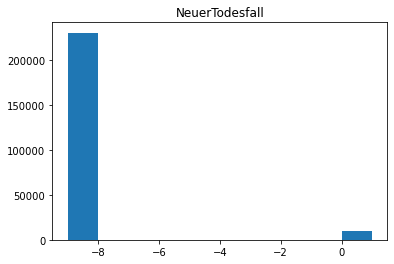

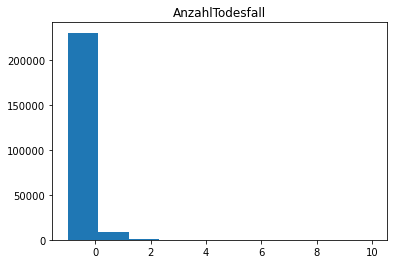

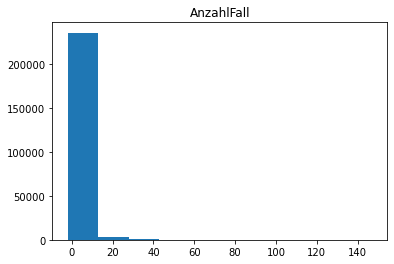

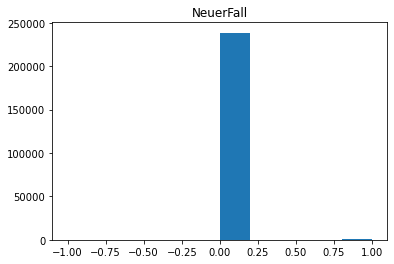

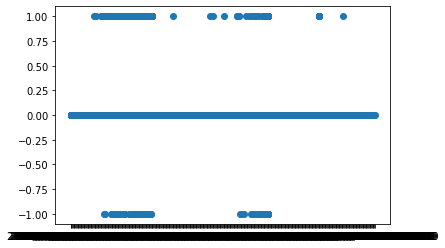

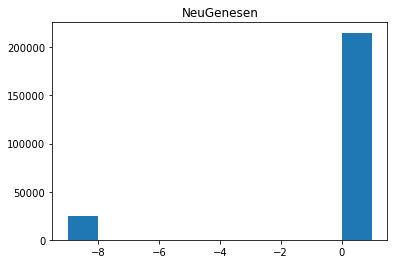

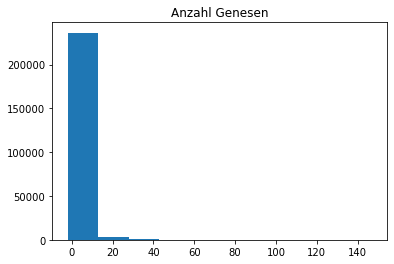

        ObjectId  IdBundesland           Bundesland      Landkreis  \
135865    135866             5  Nordrhein-Westfalen  SK Düsseldorf   
135866    135867             5  Nordrhein-Westfalen  SK Düsseldorf   
135867    135868             5  Nordrhein-Westfalen  SK Düsseldorf   
135868    135869             5  Nordrhein-Westfalen  SK Düsseldorf   
135869    135870             5  Nordrhein-Westfalen  SK Düsseldorf   

       Altersgruppe Geschlecht  AnzahlFall  AnzahlTodesfall  \
135865      A00-A04          M           1                0   
135866      A00-A04          M           1                0   
135867      A00-A04          M           1                0   
135868      A00-A04          M           1                0   
135869      A00-A04          M           1                0   

                    Meldedatum  IdLandkreis             Datenstand  NeuerFall  \
135865  2020/04/16 00:00:00+00         5111  04.02.2021, 00:00 Uhr          0   
135866  2020/05/02 00:00:00+00        

In [2]:
#Visualize data to get a better understanding

plt.hist(df1['NeuerTodesfall'])
plt.title("NeuerTodesfall")
plt.show()

plt.hist(df1['AnzahlTodesfall'])
plt.title("AnzahlTodesfall")
plt.show()

plt.hist(df1['AnzahlFall'])
plt.title("AnzahlFall")
plt.show()

plt.hist(df1['NeuerFall'])
plt.title("NeuerFall")
plt.show()

plt.plot(df1['Refdatum'], df1['NeuerFall'], 'o')
plt.show()

plt.hist(df1['NeuGenesen'])
plt.title("NeuGenesen")
plt.show()

plt.hist(df1['AnzahlGenesen'])
plt.title("Anzahl Genesen")
plt.show()
print(df1.head())

df1['Refdatum'] = pd.to_datetime(df1['Refdatum'])
df1['Refdatum'] = df1['Refdatum'].dt.tz_convert(None)
df1 = df1.rename(columns={'Refdatum': 'date', 'IdLandkreis': 'county-identifier', 
                          'AnzahlFall': 'number of actively infected', 'AnzahlGenesen': 'number of recovered', 
                         'Altersgruppe': 'age group'})

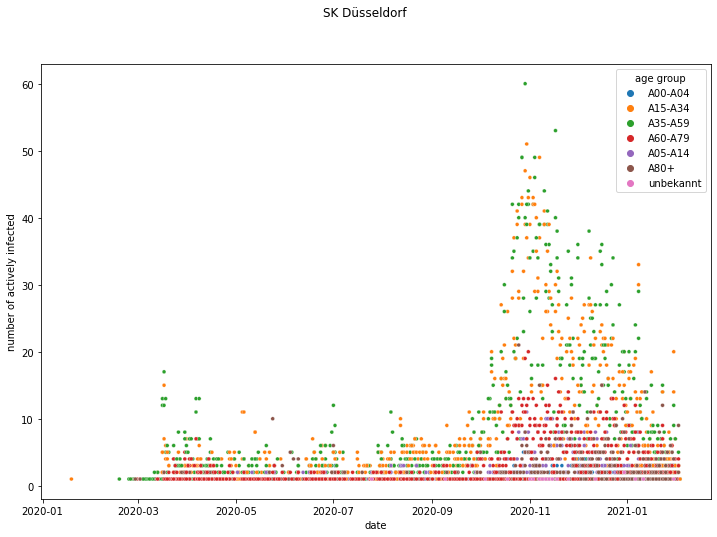

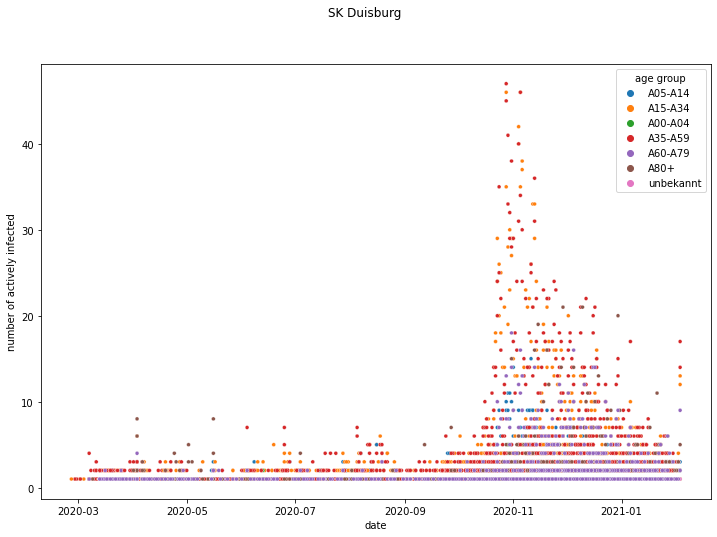

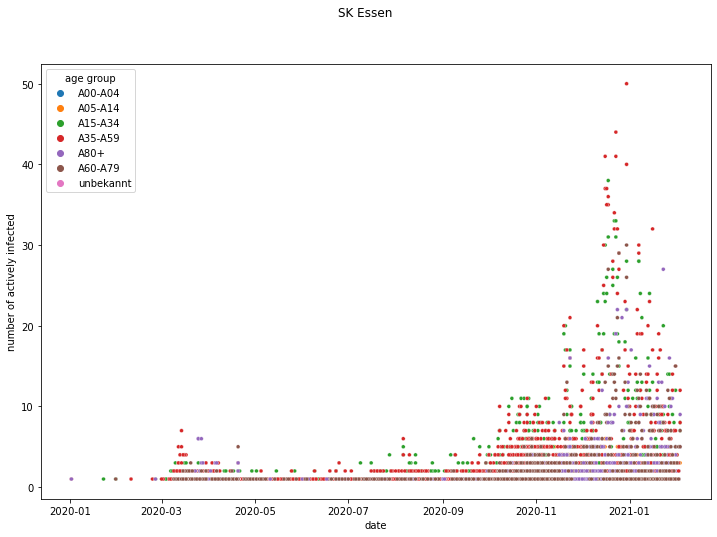

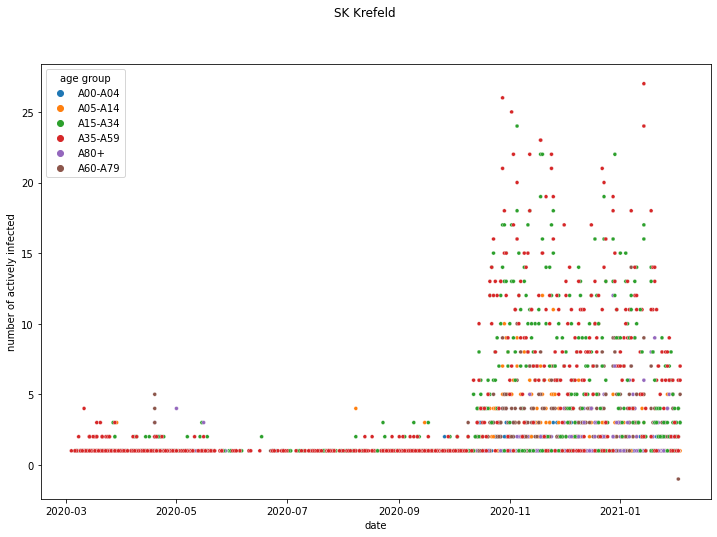

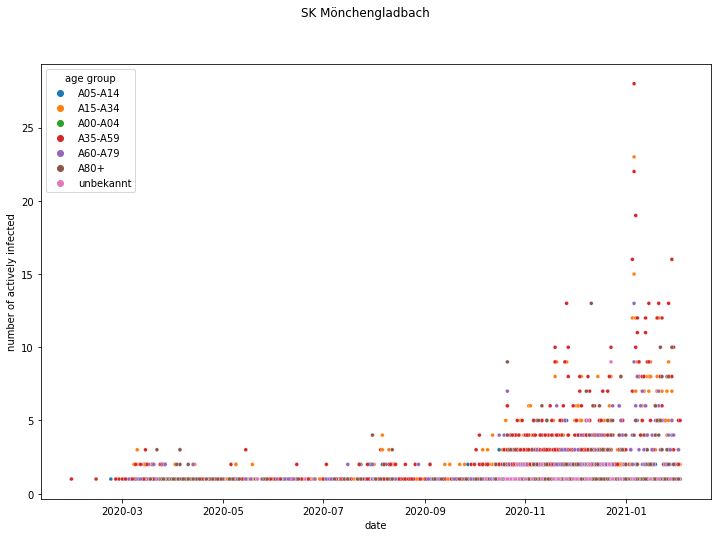

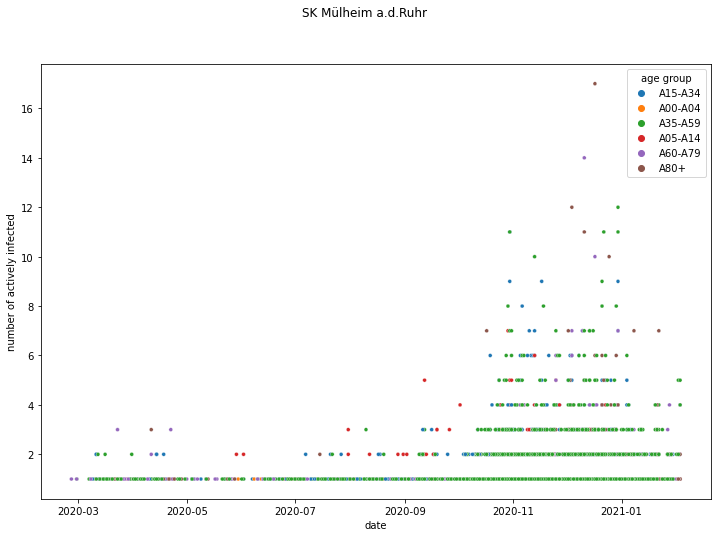

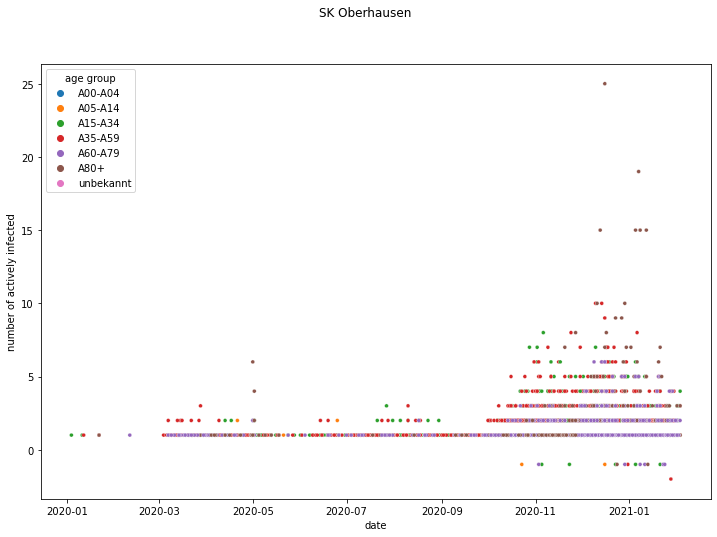

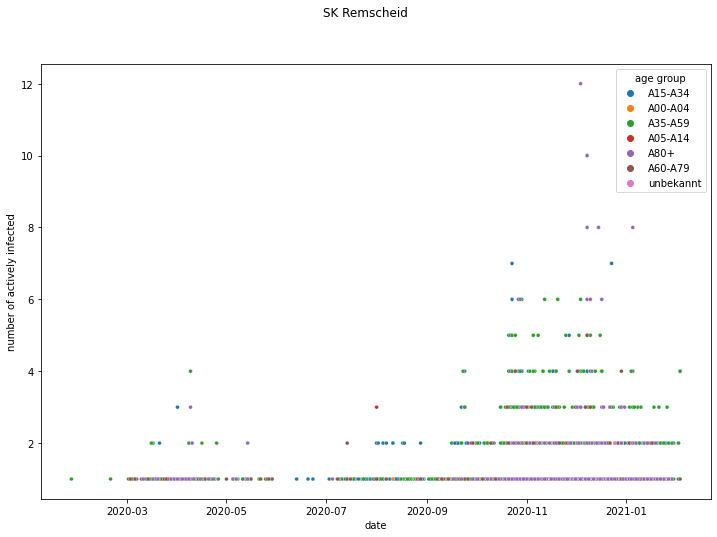

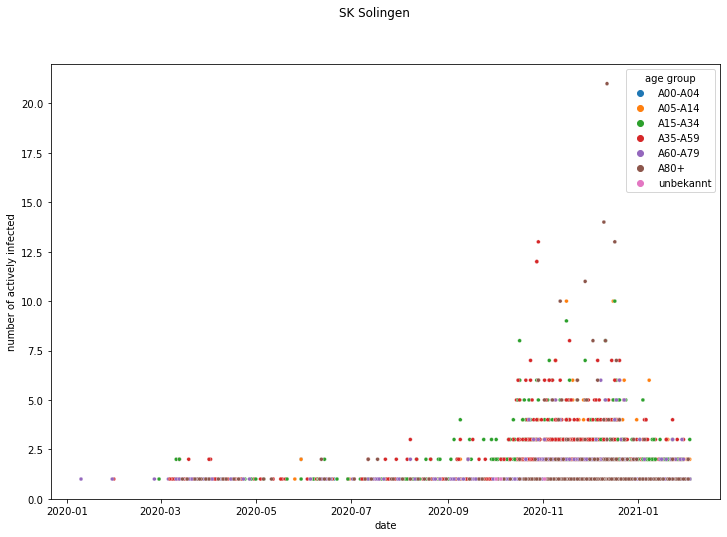

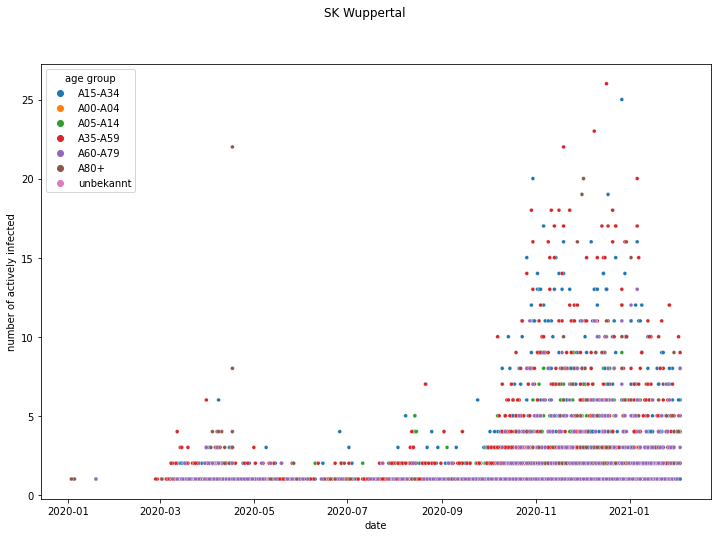

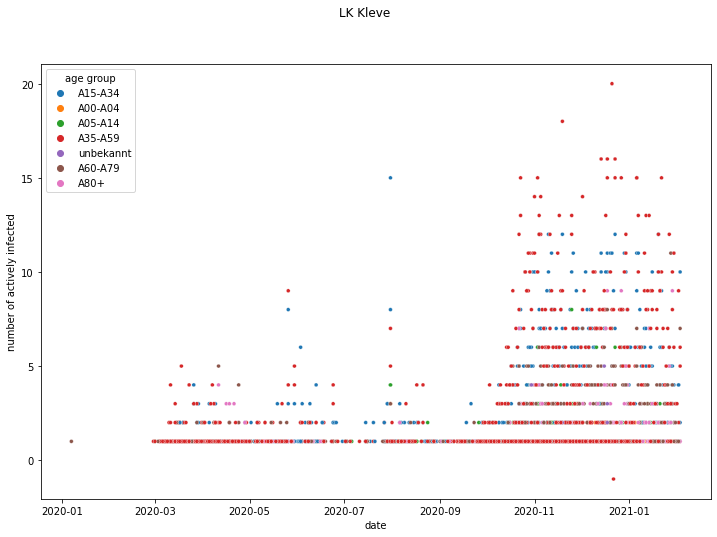

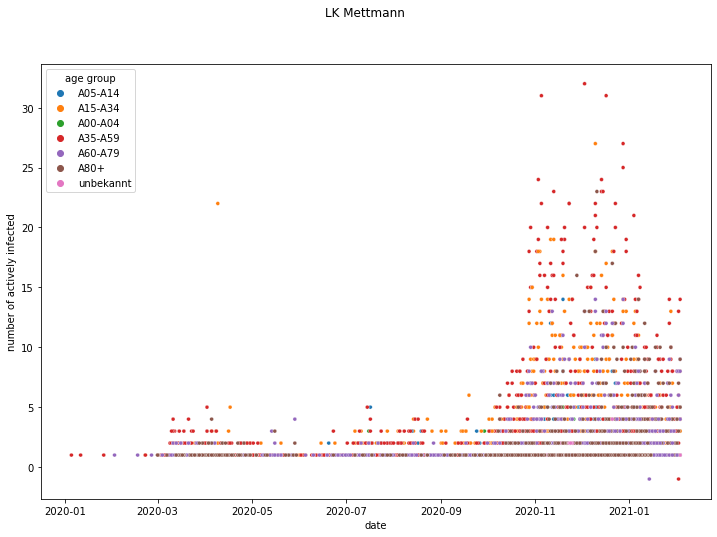

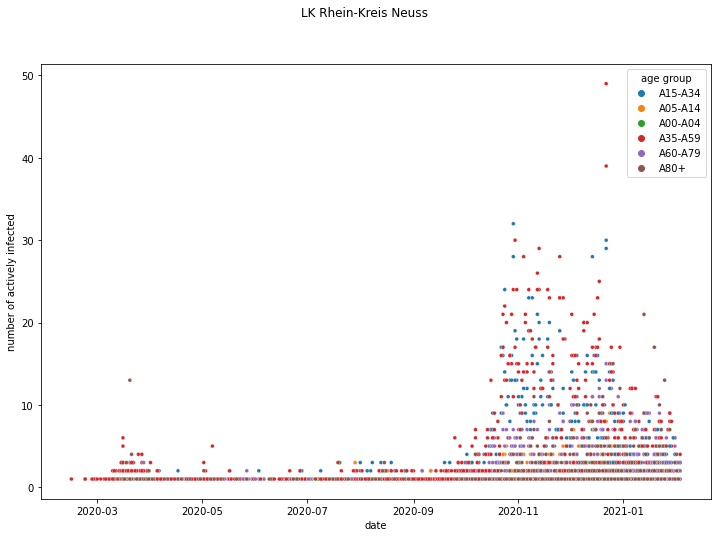

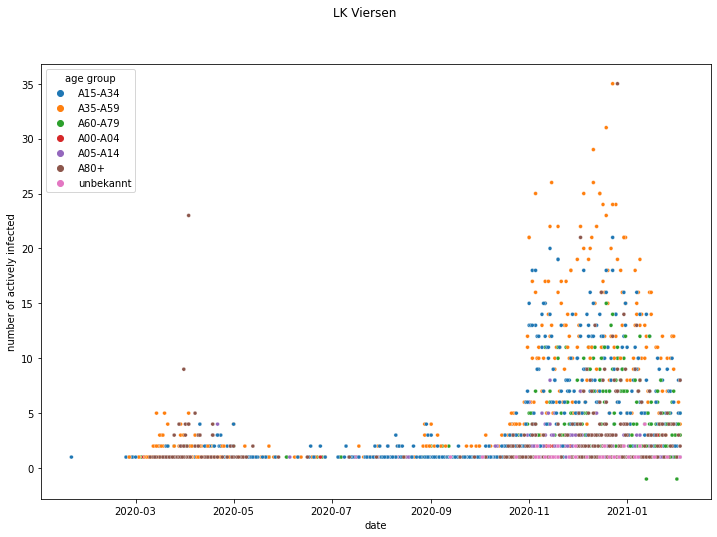

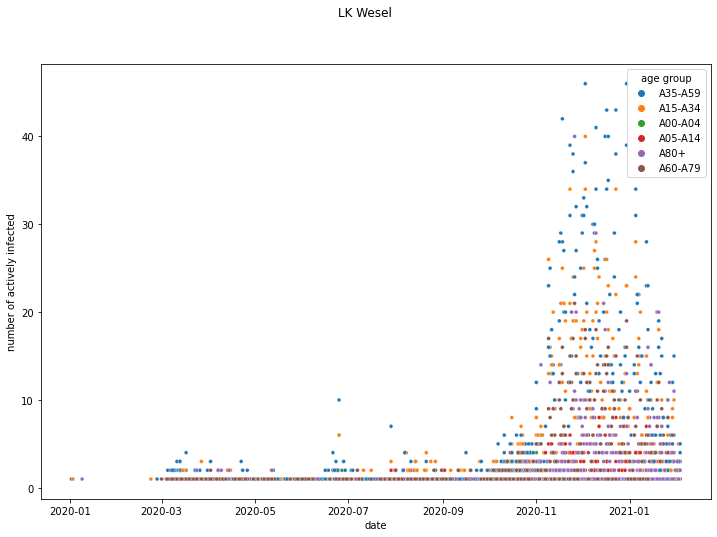

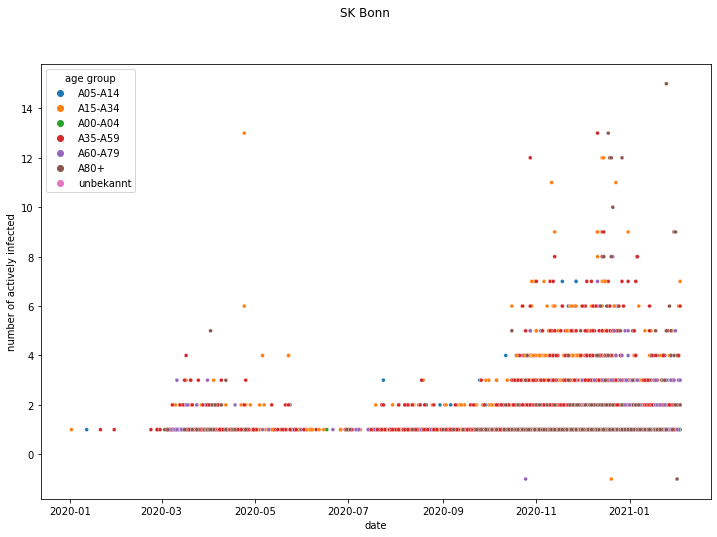

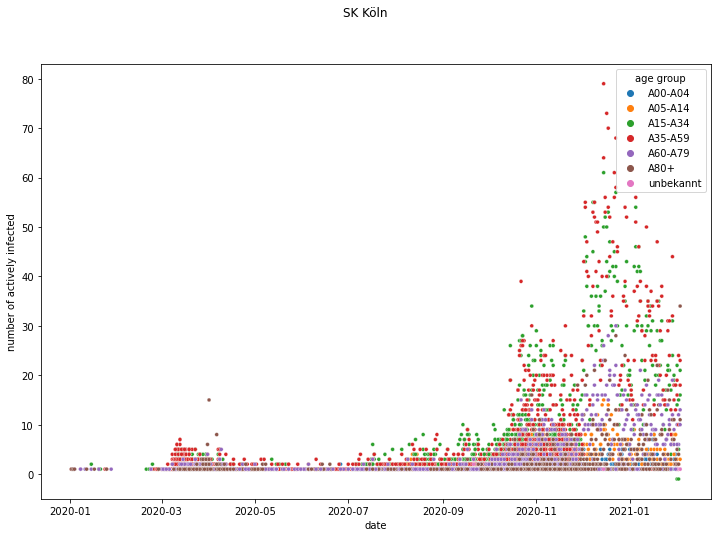

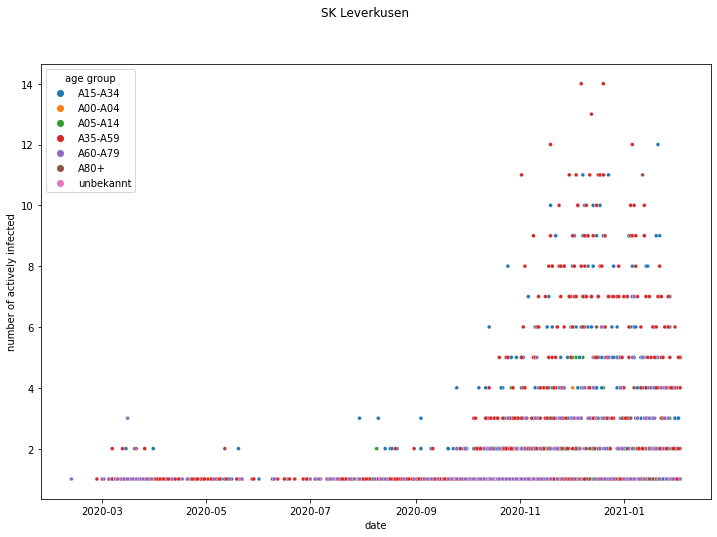

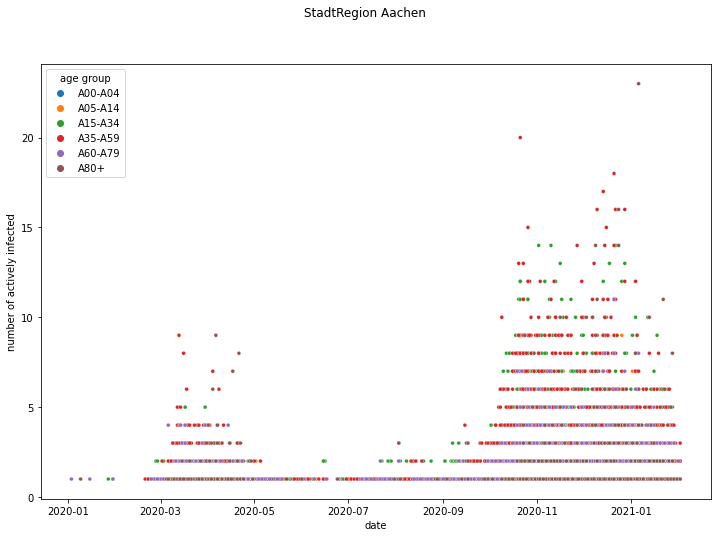

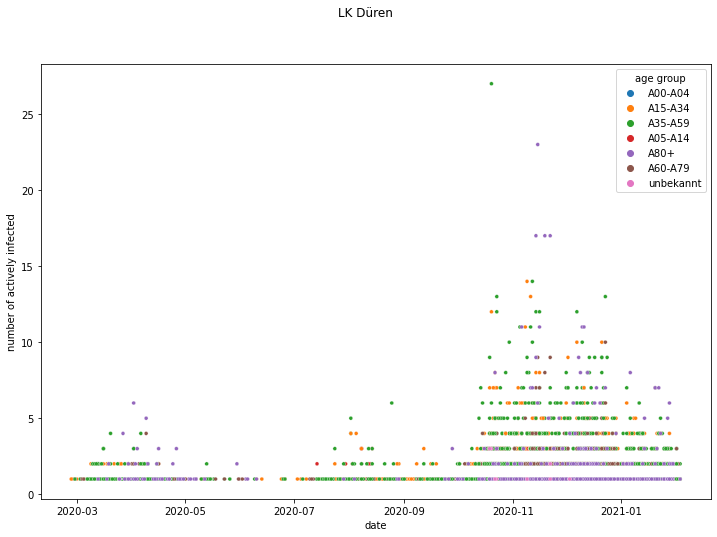

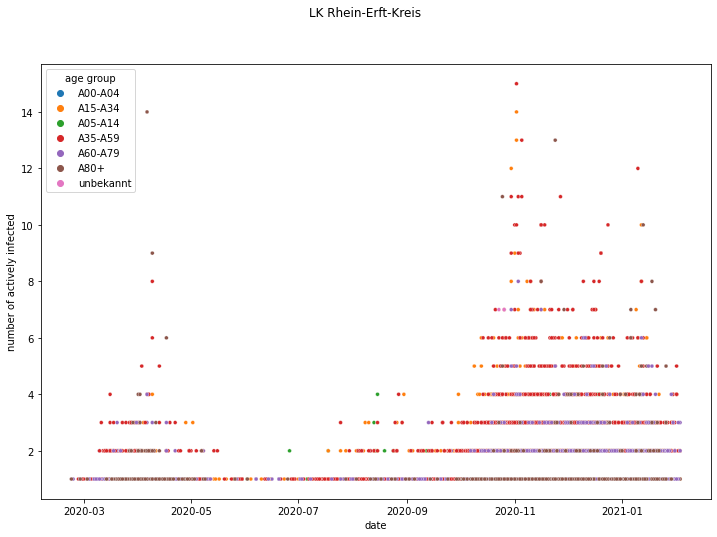

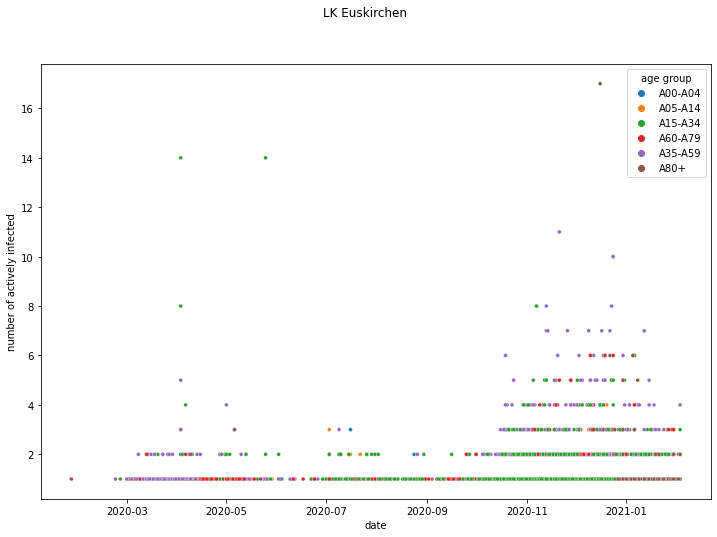

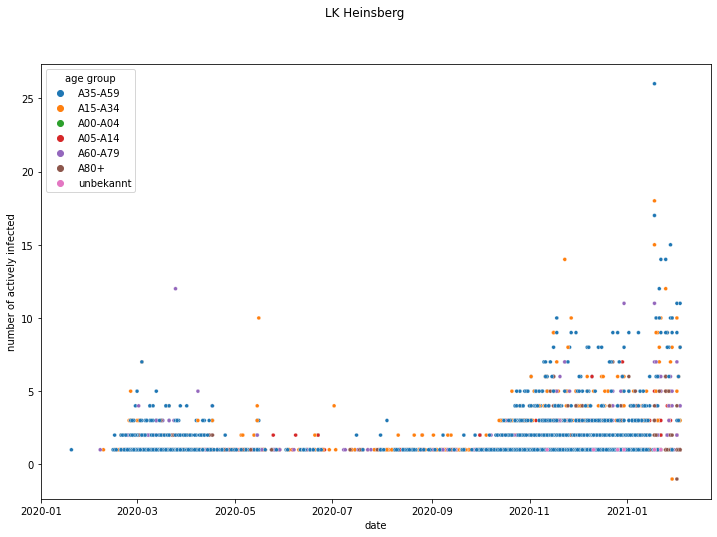

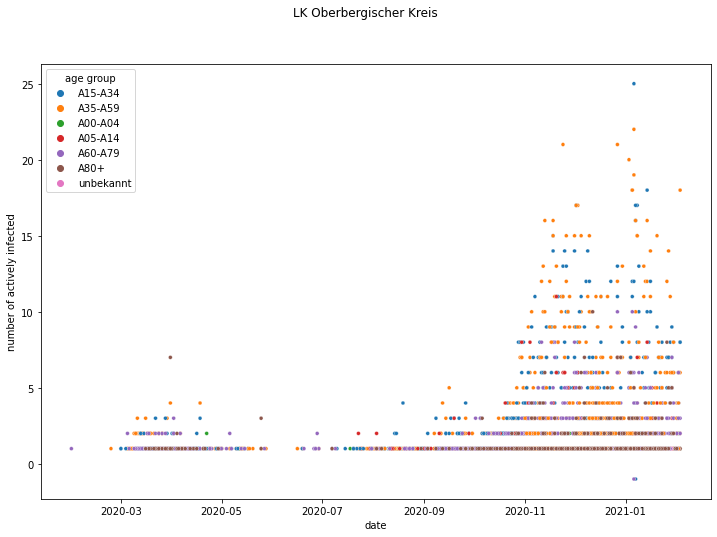

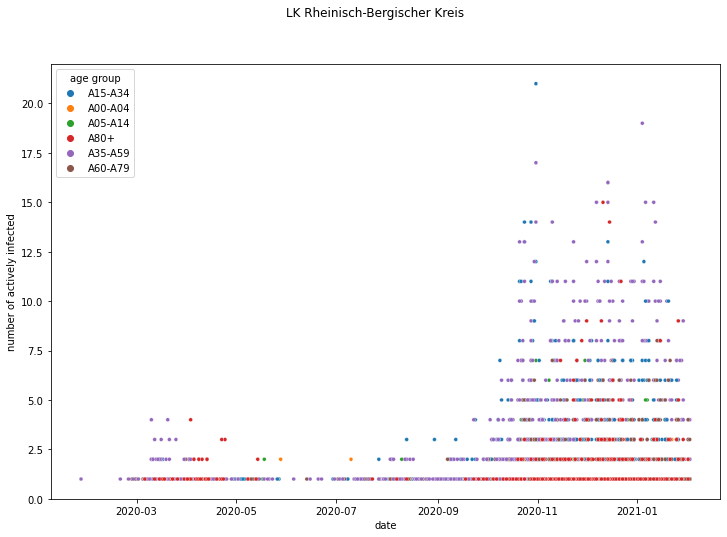

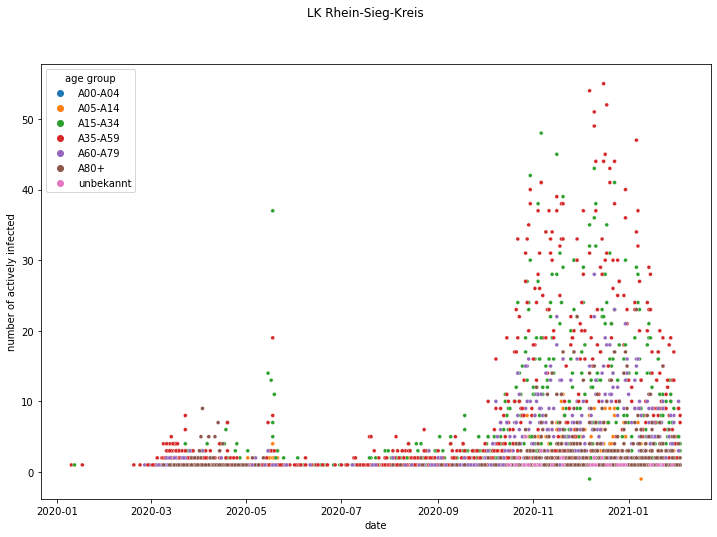

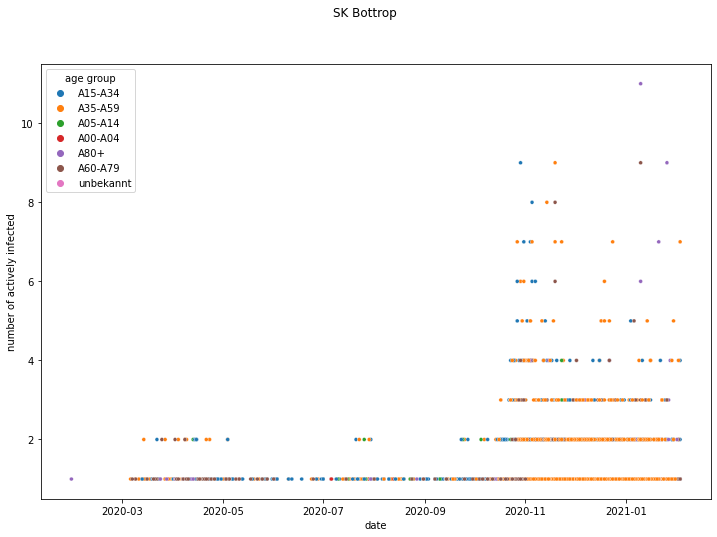

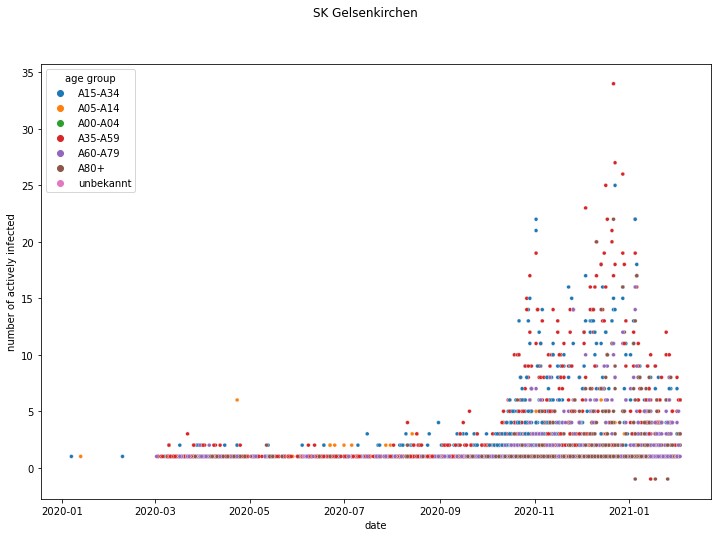

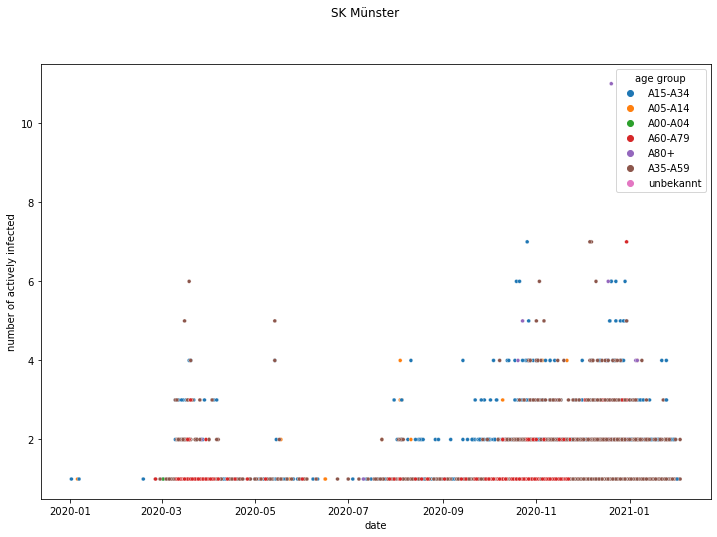

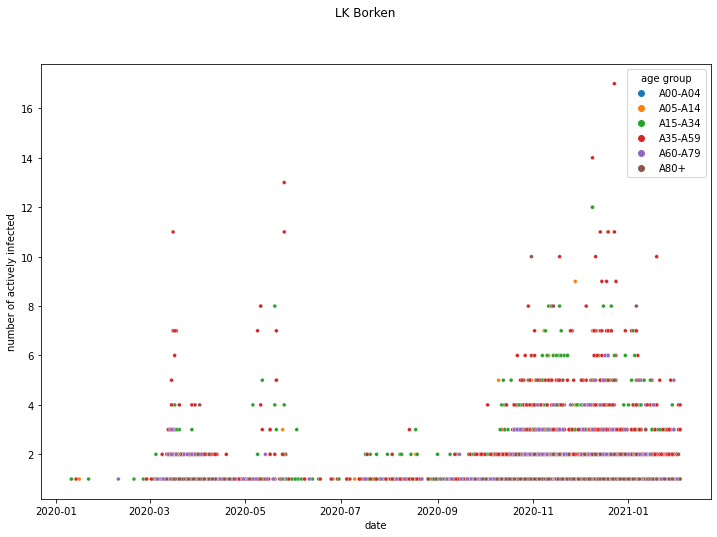

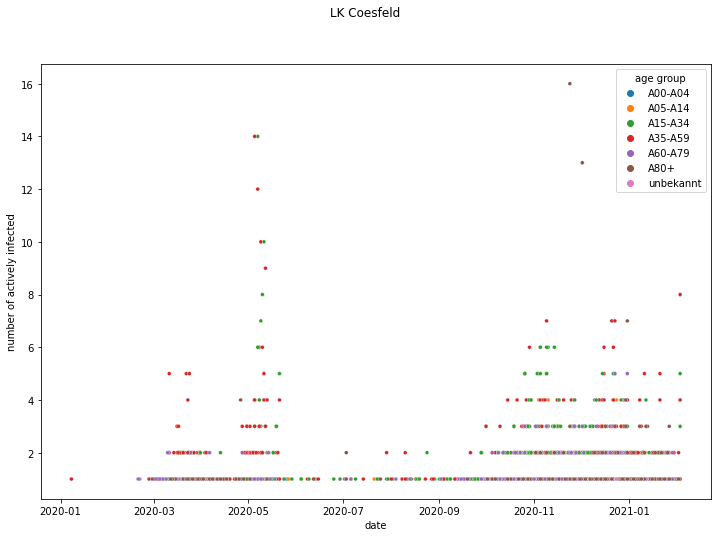

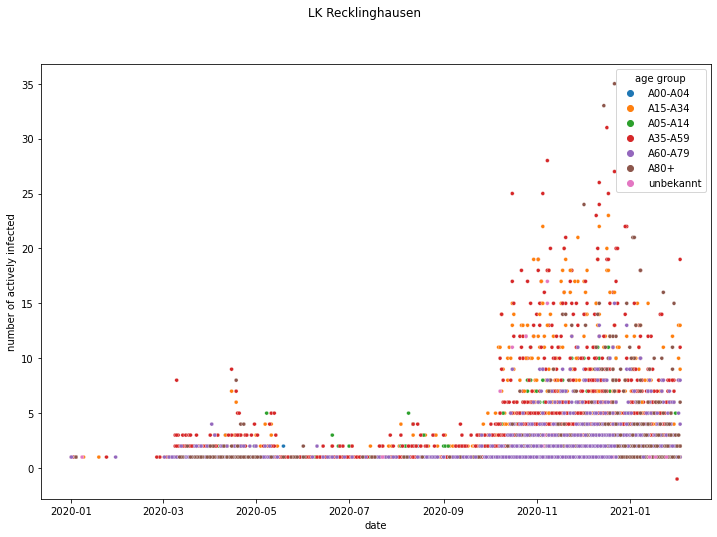

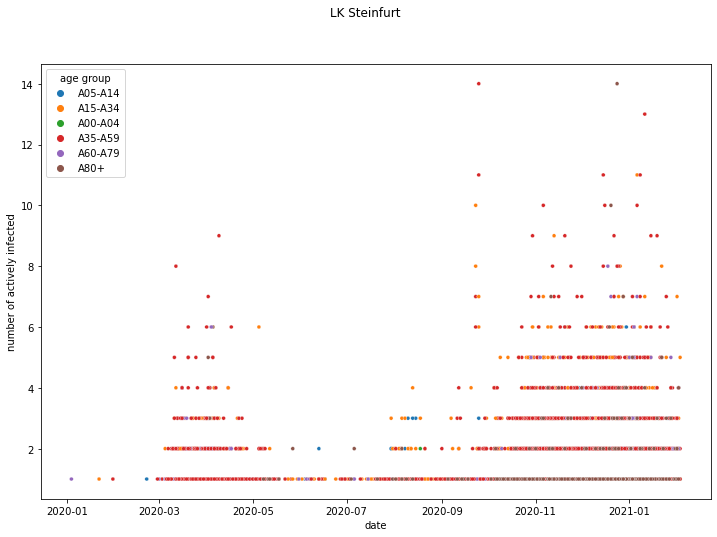

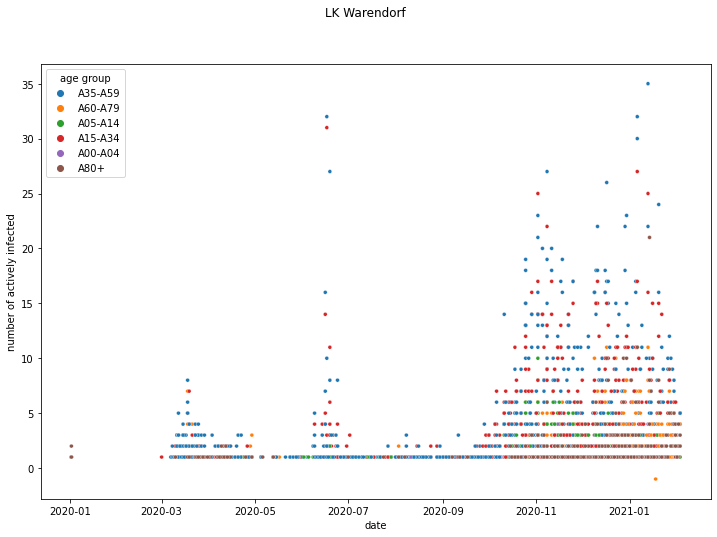

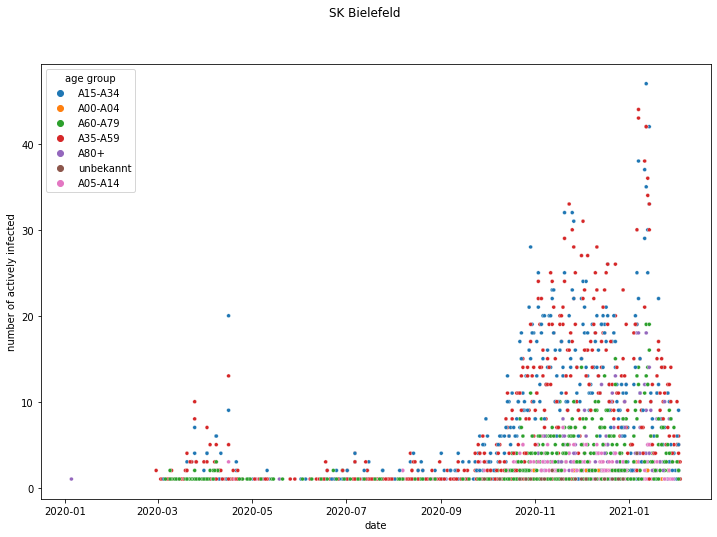

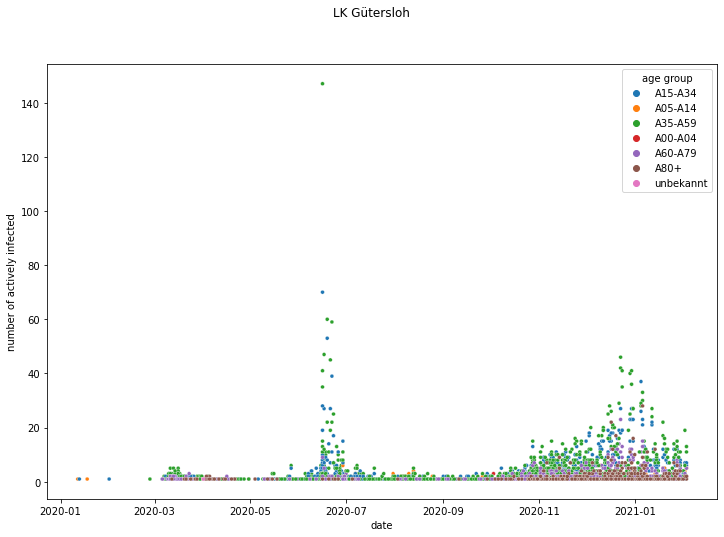

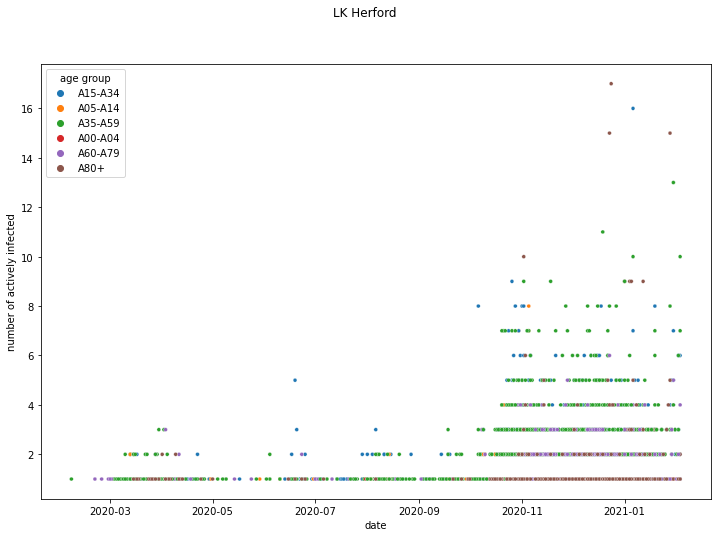

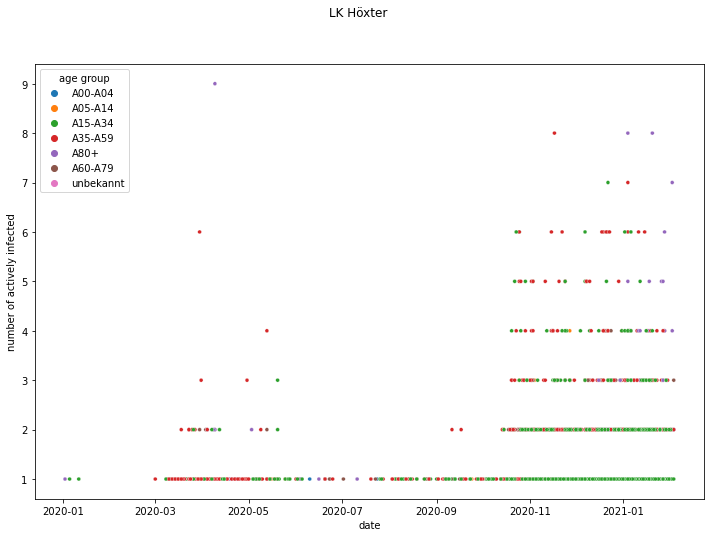

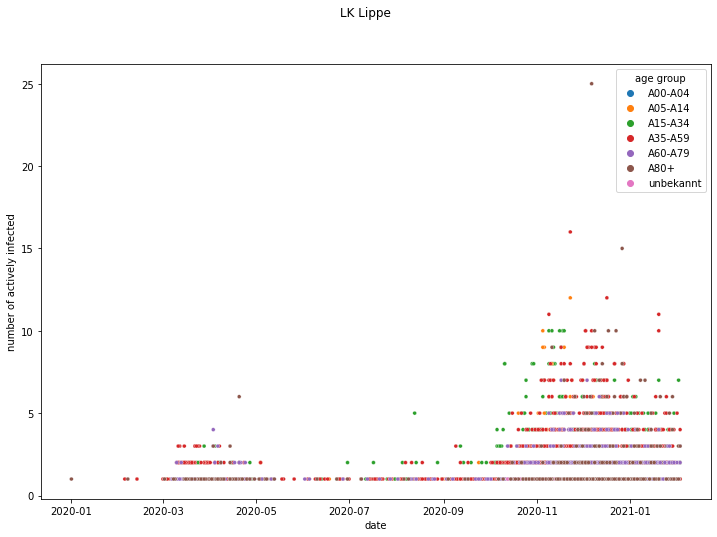

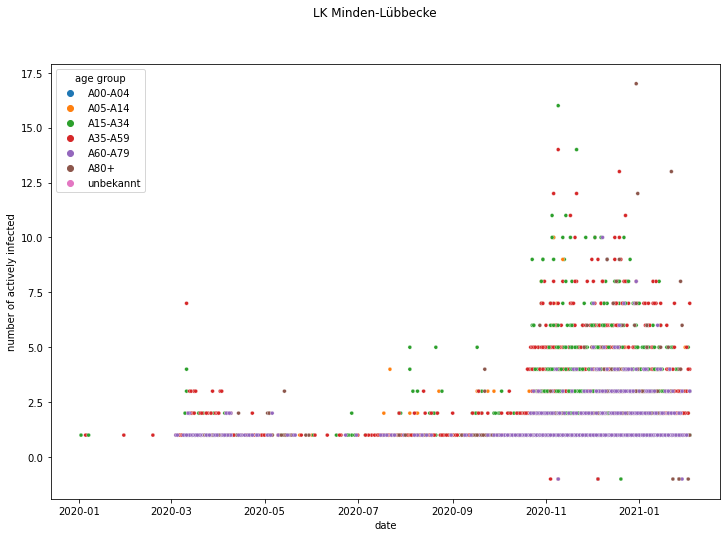

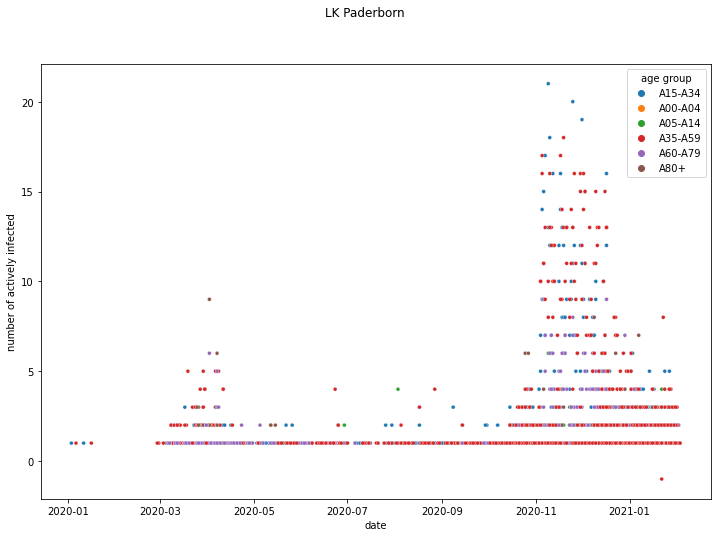

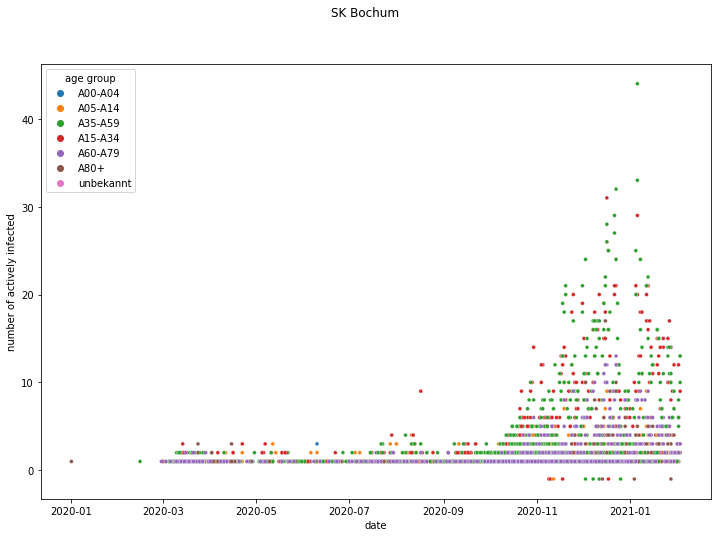

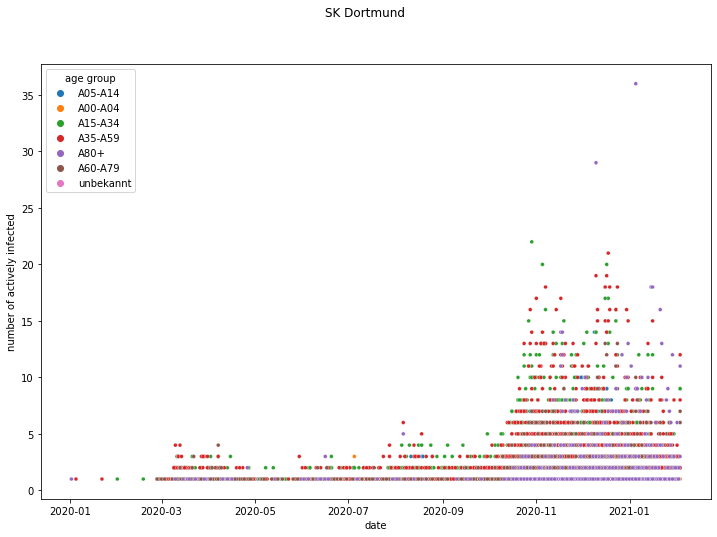

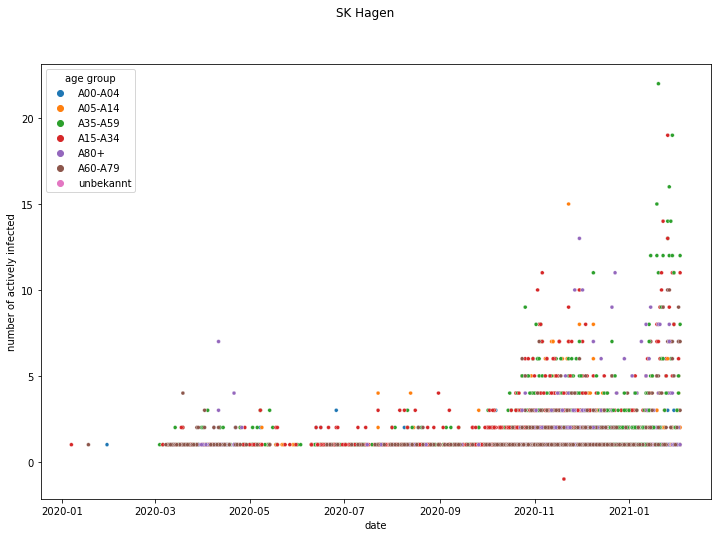

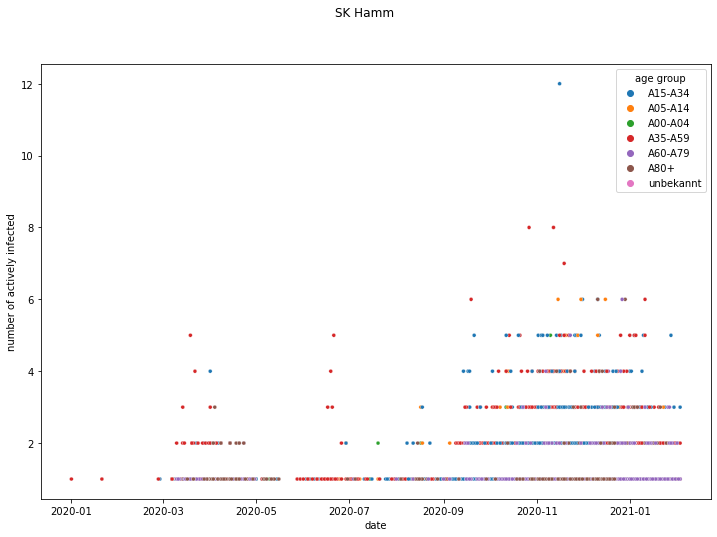

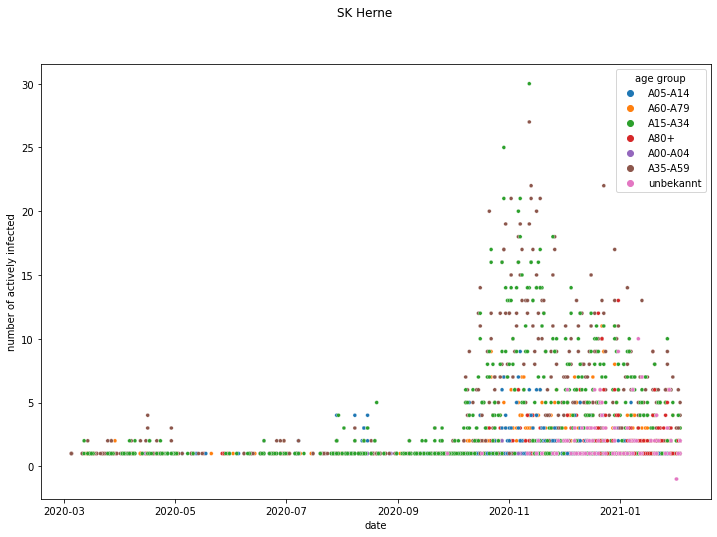

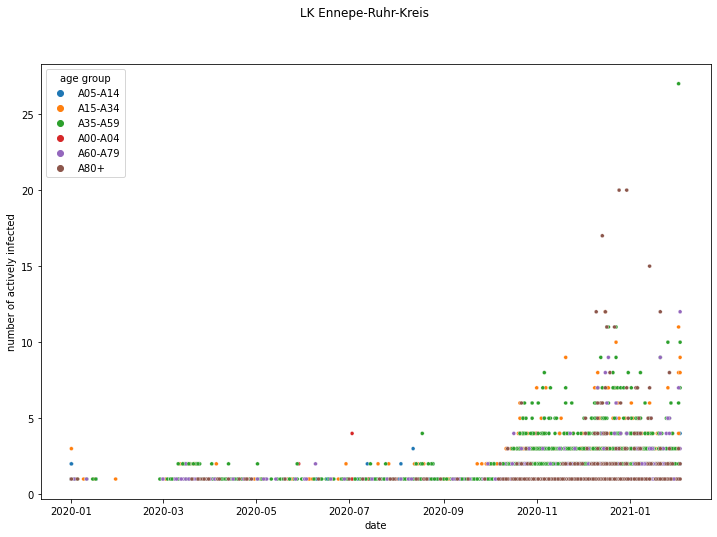

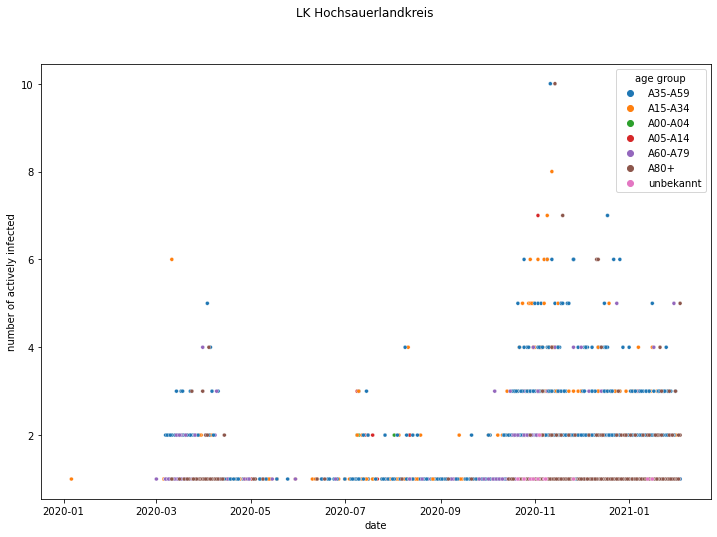

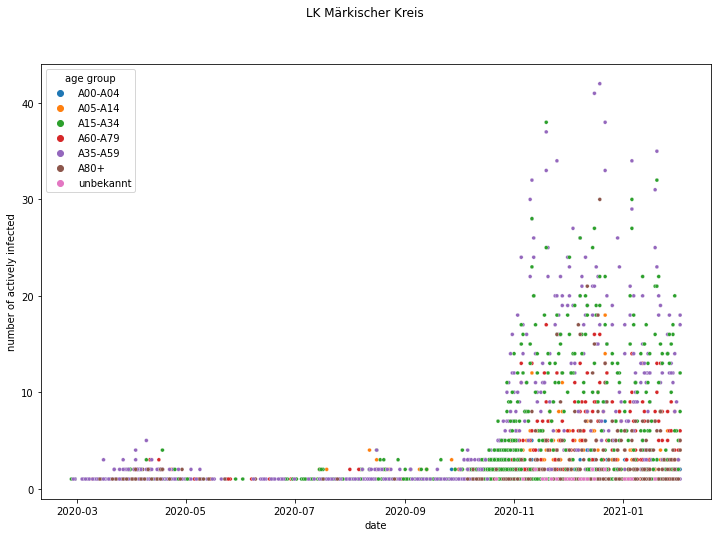

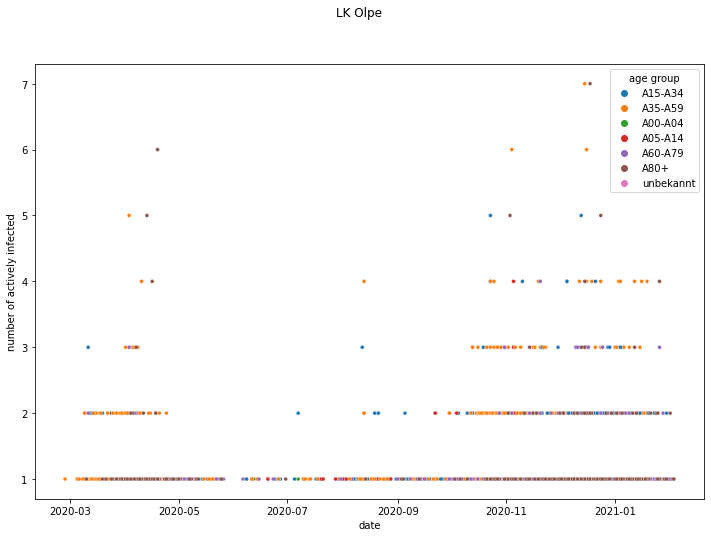

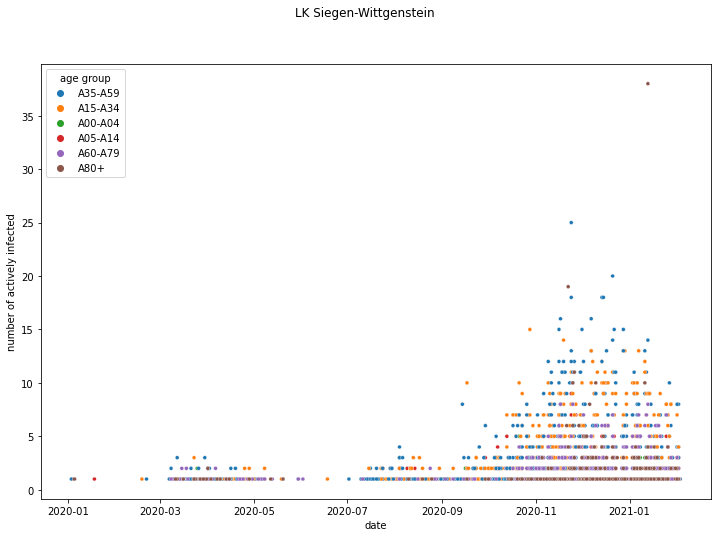

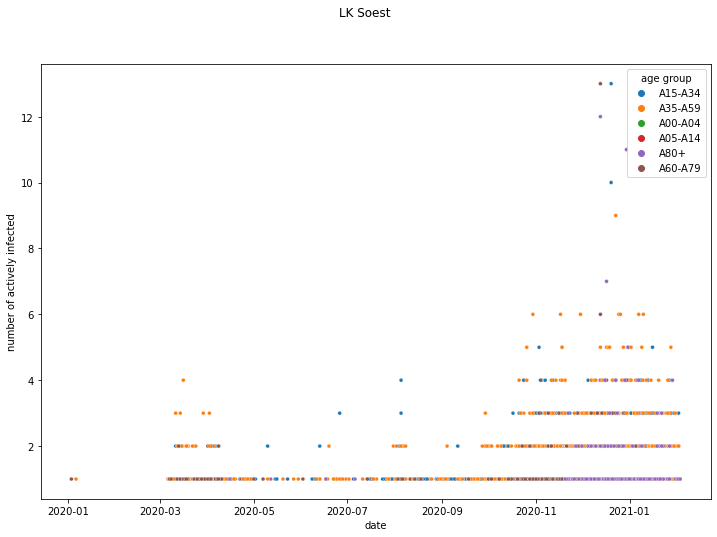

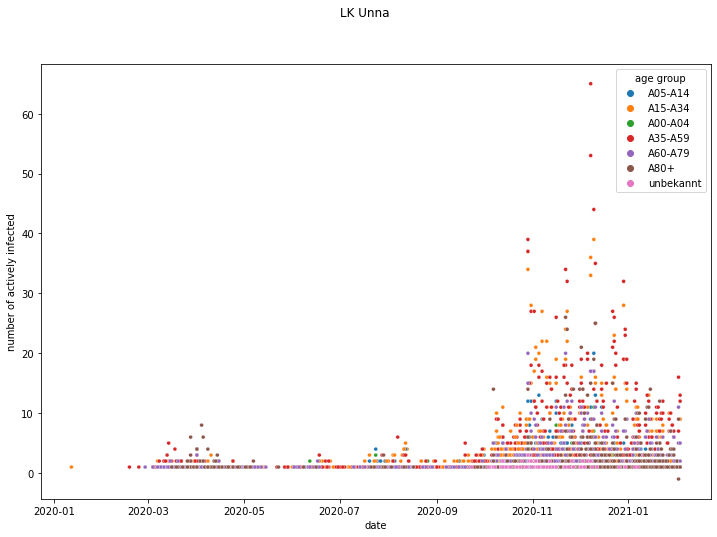

In [3]:
county = ['SK Düsseldorf', 'SK Duisburg', 'SK Essen', 'SK Krefeld',
 'SK Mönchengladbach', 'SK Mülheim a.d.Ruhr', 'SK Oberhausen', 'SK Remscheid',
 'SK Solingen', 'SK Wuppertal', 'LK Kleve', 'LK Mettmann',
 'LK Rhein-Kreis Neuss', 'LK Viersen', 'LK Wesel', 'SK Bonn', 'SK Köln',
 'SK Leverkusen', 'StadtRegion Aachen', 'LK Düren', 'LK Rhein-Erft-Kreis',
 'LK Euskirchen', 'LK Heinsberg', 'LK Oberbergischer Kreis',
 'LK Rheinisch-Bergischer Kreis', 'LK Rhein-Sieg-Kreis', 'SK Bottrop',
 'SK Gelsenkirchen', 'SK Münster', 'LK Borken', 'LK Coesfeld',
 'LK Recklinghausen', 'LK Steinfurt', 'LK Warendorf', 'SK Bielefeld',
 'LK Gütersloh', 'LK Herford', 'LK Höxter', 'LK Lippe', 'LK Minden-Lübbecke',
 'LK Paderborn', 'SK Bochum', 'SK Dortmund', 'SK Hagen', 'SK Hamm', 'SK Herne',
 'LK Ennepe-Ruhr-Kreis', 'LK Hochsauerlandkreis', 'LK Märkischer Kreis',
 'LK Olpe', 'LK Siegen-Wittgenstein', 'LK Soest', 'LK Unna']

for c in county:
    dfc=df1[df1['Landkreis']==c]
    sns.scatterplot(x=dfc['date'], y=dfc["number of actively infected"], hue=dfc["age group"], s=15)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    fig.suptitle(c, fontsize=12)
    #plt.savefig(r"C:\data\corona\Altersgruppe.jpeg")
    plt.show()

In [4]:
df2 = df1.groupby(['date', 'county-identifier'], as_index=False).agg({"number of actively infected": "sum", 
                                                                      "number of recovered": "sum"})
print(df2.head())
print(df2.shape)

        date  county-identifier  number of actively infected  \
0 2020-01-01               5562                            3   
1 2020-01-01               5766                            1   
2 2020-01-01               5911                            1   
3 2020-01-01               5915                            1   
4 2020-01-01               5954                           15   

   number of recovered  
0                    3  
1                    1  
2                    1  
3                    1  
4                   15  
(16413, 4)


In [5]:
df3 = pd.read_excel('C:\data\corona\BVD_NRW.xlsx')
print(df3.head())

   county-identifier regional designation                  county  NUTS3  \
0               5111     Kreisfreie Stadt       Düsseldorf, Stadt  DEA11   
1               5112     Kreisfreie Stadt         Duisburg, Stadt  DEA12   
2               5113     Kreisfreie Stadt            Essen, Stadt  DEA13   
3               5114     Kreisfreie Stadt          Krefeld, Stadt  DEA14   
4               5116     Kreisfreie Stadt  Mönchengladbach, Stadt  DEA15   

   area in sq. km  total population  male population  female population  \
0          217.41            621877           300507             321370   
1          232.80            498686           246860             251826   
2          210.34            582760           282869             299891   
3          137.78            227417           111015             116402   
4          170.47            261034           128467             132567   

   population per sq. km  
0                   2860  
1                   2142  
2          

In [6]:
df4 = pd.merge(df2, df3, on = 'county-identifier', how = 'inner')
df4["percentage of infected"] = df4['number of actively infected']/df4['total population']
print(df4.dtypes)
print(df4.head())
print(df4.shape)

date                           datetime64[ns]
county-identifier                       int64
number of actively infected             int64
number of recovered                     int64
regional designation                   object
county                                 object
NUTS3                                  object
area in sq. km                        float64
total population                        int64
male population                         int64
female population                       int64
population per sq. km                   int64
percentage of infected                float64
dtype: object
        date  county-identifier  number of actively infected  \
0 2020-01-01               5562                            3   
1 2020-01-02               5562                            2   
2 2020-01-03               5562                            2   
3 2020-01-04               5562                            3   
4 2020-01-08               5562                            1   

   

In [7]:
df5 = pd.read_excel('C:\data\corona\Arbeitslosenquote2019.xlsx')
df5 = df5.iloc[:,[0, 14]]
df5 = df5.rename(columns={'Unnamed: 0': 'county-identifier', 'Durchschnittliche Anzahl Arbeitslose 2019':
                         'average number of unemployed people 2019'})
print(df5.head())

   county-identifier  average number of unemployed people 2019
0                  5                             635485.916667
1                 51                             206445.416667
2               5111                              22478.250000
3               5112                              27830.583333
4               5113                              30749.416667


In [8]:
df6 = pd.merge(df4, df5, on = 'county-identifier', how = 'inner')
df6['average unemployment rate 2019'] = df6['average number of unemployed people 2019'] / df6['total population']
print(df6.head())

        date  county-identifier  number of actively infected  \
0 2020-01-01               5562                            3   
1 2020-01-02               5562                            2   
2 2020-01-03               5562                            2   
3 2020-01-04               5562                            3   
4 2020-01-08               5562                            1   

   number of recovered regional designation          county  NUTS3  \
0                    3                Kreis  Recklinghausen  DEA36   
1                    2                Kreis  Recklinghausen  DEA36   
2                    2                Kreis  Recklinghausen  DEA36   
3                    2                Kreis  Recklinghausen  DEA36   
4                    1                Kreis  Recklinghausen  DEA36   

   area in sq. km  total population  male population  female population  \
0          761.31            614137           299253             314884   
1          761.31            614137         

In [9]:
df7 = pd.read_excel('C:\data\corona\Einkommen.xlsx')
df7 = df7.iloc[:,[0,3]]
df7 = df7.rename(columns={'IdLandkreis': 'county-identifier', 'verfüg. Einkommen der priv. Haushalte je Einwohner (€)':
                         'disposable income per inhabitant (€)'})
print(df7.head())

   county-identifier disposable income per inhabitant (€)
0                 51                                22348
1               5111                                26087
2               5112                                17126
3               5113                                20626
4               5114                                21591


In [10]:
df8 = pd.merge(df6, df7, on = 'county-identifier', how = 'inner')
print(df8.head())

        date  county-identifier  number of actively infected  \
0 2020-01-01               5562                            3   
1 2020-01-02               5562                            2   
2 2020-01-03               5562                            2   
3 2020-01-04               5562                            3   
4 2020-01-08               5562                            1   

   number of recovered regional designation          county  NUTS3  \
0                    3                Kreis  Recklinghausen  DEA36   
1                    2                Kreis  Recklinghausen  DEA36   
2                    2                Kreis  Recklinghausen  DEA36   
3                    2                Kreis  Recklinghausen  DEA36   
4                    1                Kreis  Recklinghausen  DEA36   

   area in sq. km  total population  male population  female population  \
0          761.31            614137           299253             314884   
1          761.31            614137         

In [11]:
df9 = pd.read_excel(r'C:\data\corona\Bundestagswahl17.xlsx')
df9 = df9.rename(columns={'Unnamed: 0': 'county-identifier', 'Sonstige Parteien': 'other parties'})
print(df9.head())

   county-identifier                      Unnamed: 1 Wahlberechtigte   Wähler  \
0                  5             Nordrhein-Westfalen        13174577  9938461   
1                 51    Düsseldorf, Regierungsbezirk         3736990  2782419   
2               5111         Düsseldorf, krfr. Stadt          413939   316546   
3               5112           Duisburg, krfr. Stadt          328202   225342   
4               5113              Essen, krfr. Stadt          419680   310235   

  Insgesamt      CDU      SPD      FDP     AfD Bündnis 90/Die Grünen  \
0   9853377  3214013  2557876  1293052  928425                744970   
1   2757746   873413   711241   386181  268142                196852   
2    314456    95658    66711    55217   24997                 31527   
3    221408    53576    72620    20860   29343                 12337   
4    307703    84119    87154    38675   35155                 23468   

  DIE LINKE PIRATEN other parties  
0    736904   43580        334557  
1    209

In [12]:
df10 = pd.merge(df8, df9, on = 'county-identifier', how = 'inner')


df10["CDU%"]=df10["CDU"]/df10["Wähler"]
df10["SPD%"]=df10["SPD"]/df10["Wähler"]
df10["FDP%"]=df10["FDP"]/df10["Wähler"]
df10["AfD%"]=df10["AfD"]/df10["Wähler"]
df10["Bündnis 90/Die Grünen%"]=df10["Bündnis 90/Die Grünen"]/df10["Wähler"]
df10["DIE LINKE%"]=df10["DIE LINKE"]/df10["Wähler"]
df10["PIRATEN%"]=df10["PIRATEN"]/df10["Wähler"]
df10["other parties%"]=df10["other parties"]/df10["Wähler"]

print(df10.head())

        date  county-identifier  number of actively infected  \
0 2020-01-01               5562                            3   
1 2020-01-02               5562                            2   
2 2020-01-03               5562                            2   
3 2020-01-04               5562                            3   
4 2020-01-08               5562                            1   

   number of recovered regional designation          county  NUTS3  \
0                    3                Kreis  Recklinghausen  DEA36   
1                    2                Kreis  Recklinghausen  DEA36   
2                    2                Kreis  Recklinghausen  DEA36   
3                    2                Kreis  Recklinghausen  DEA36   
4                    1                Kreis  Recklinghausen  DEA36   

   area in sq. km  total population  male population  female population  \
0          761.31            614137           299253             314884   
1          761.31            614137         

In [13]:
df10 = df10.drop(['Unnamed: 1', 'Wahlberechtigte', 'Wähler', 'Insgesamt', 'CDU', 'SPD', 'FDP', 'AfD',
       'Bündnis 90/Die Grünen', 'DIE LINKE', 'PIRATEN', 'other parties', 'number of recovered', 
        'regional designation', 'NUTS3', 'male population', 'female population', 'number of actively infected',
        'average number of unemployed people 2019'], axis=1)
print(df10.columns)

Index(['date', 'county-identifier', 'county', 'area in sq. km',
       'total population', 'population per sq. km', 'percentage of infected',
       'average unemployment rate 2019',
       'disposable income per inhabitant (€)', 'CDU%', 'SPD%', 'FDP%', 'AfD%',
       'Bündnis 90/Die Grünen%', 'DIE LINKE%', 'PIRATEN%', 'other parties%'],
      dtype='object')


In [14]:
df11 = pd.read_excel(r'C:\data\corona\Schutzmaßnahmen.xlsx')
print(df11.head())

        date                  school lessons              university lectures  \
0 2020-01-01  in-class lessons without masks  in-class lectures without masks   
1 2020-01-02  in-class lessons without masks  in-class lectures without masks   
2 2020-01-03  in-class lessons without masks  in-class lectures without masks   
3 2020-01-04  in-class lessons without masks  in-class lectures without masks   
4 2020-01-05  in-class lessons without masks  in-class lectures without masks   

   obligation to wear a mask in shops restaurants  \
0                                   0        open   
1                                   0        open   
2                                   0        open   
3                                   0        open   
4                                   0        open   

  number of guests at a wedding number of people you can meet in public  
0                     unlimited                               unlimited  
1                     unlimited               

In [15]:
df12 = pd.merge(df10, df11, on = 'date', how = 'inner')
print(df12.head())

        date  county-identifier             county  area in sq. km  \
0 2020-01-01               5562     Recklinghausen          761.31   
1 2020-01-01               5766              Lippe         1246.22   
2 2020-01-01               5911      Bochum, Stadt          145.66   
3 2020-01-01               5915        Hamm, Stadt          226.44   
4 2020-01-01               5954  Ennepe-Ruhr-Kreis          409.64   

   total population  population per sq. km  percentage of infected  \
0            614137                    807                0.000005   
1            347514                    279                0.000003   
2            365587                   2510                0.000003   
3            179916                    795                0.000006   
4            324106                    791                0.000046   

   average unemployment rate 2019 disposable income per inhabitant (€)  \
0                        0.043034                                20426   
1         

In [16]:
df12 = df12.sort_values(by = 'date')
print(df12.head())

        date  county-identifier             county  area in sq. km  \
0 2020-01-01               5562     Recklinghausen          761.31   
1 2020-01-01               5766              Lippe         1246.22   
2 2020-01-01               5911      Bochum, Stadt          145.66   
3 2020-01-01               5915        Hamm, Stadt          226.44   
4 2020-01-01               5954  Ennepe-Ruhr-Kreis          409.64   

   total population  population per sq. km  percentage of infected  \
0            614137                    807                0.000005   
1            347514                    279                0.000003   
2            365587                   2510                0.000003   
3            179916                    795                0.000006   
4            324106                    791                0.000046   

   average unemployment rate 2019 disposable income per inhabitant (€)  \
0                        0.043034                                20426   
1         

In [17]:
#df12.to_csv(r'C:\data\corona\merged_data_new.csv', index = False)

In [18]:
df13 = df12[(df12['date']>'15.02.2020')]
#print(df13.head())
print(df13['county'].unique())

['Heinsberg' 'Mettmann' 'Düsseldorf, Stadt' 'Unna' 'Siegen-Wittgenstein'
 'Dortmund, Stadt' 'Minden-Lübbecke' 'Münster, Stadt' 'Rhein-Sieg-Kreis'
 'Köln, Stadt' 'Städteregion Aachen' 'Coesfeld' 'Borken'
 'Remscheid, Stadt' 'Rheinisch-Bergischer Kreis' 'Herford' 'Steinfurt'
 'Bonn, Stadt' 'Wesel' 'Euskirchen' 'Mönchengladbach, Stadt'
 'Rhein-Kreis Neuss' 'Rhein-Erft-Kreis' 'Essen, Stadt' 'Viersen'
 'Oberbergischer Kreis' 'Solingen, Klingenstadt' 'Duisburg, Stadt'
 'Mülheim an der Ruhr, Stadt' 'Recklinghausen' 'Gütersloh'
 'Wuppertal, Stadt' 'Hamm, Stadt' 'Leverkusen, Stadt' 'Düren'
 'Märkischer Kreis' 'Olpe' 'Ennepe-Ruhr-Kreis' 'Paderborn' 'Bochum, Stadt'
 'Kleve' 'Bielefeld, Stadt' 'Hochsauerlandkreis' 'Lippe' 'Höxter'
 'Warendorf' 'Gelsenkirchen, Stadt' 'Hagen, Stadt der FernUniversität'
 'Oberhausen, Stadt' 'Krefeld, Stadt' 'Herne, Stadt' 'Bottrop, Stadt'
 'Soest']


In [20]:
county = ['Heinsberg', 'Mettmann', 'Düsseldorf, Stadt', 'Unna', 'Siegen-Wittgenstein',
 'Dortmund, Stadt', 'Minden-Lübbecke', 'Münster, Stadt', 'Rhein-Sieg-Kreis',
 'Köln, Stadt', 'Städteregion Aachen', 'Coesfeld', 'Borken',
 'Remscheid, Stadt', 'Rheinisch-Bergischer Kreis', 'Herford', 'Steinfurt',
 'Bonn, Stadt', 'Wesel', 'Euskirchen', 'Mönchengladbach, Stadt',
 'Rhein-Kreis Neuss', 'Rhein-Erft-Kreis', 'Essen, Stadt', 'Viersen',
 'Oberbergischer Kreis', 'Solingen, Klingenstadt', 'Duisburg, Stadt',
 'Mülheim an der Ruhr, Stadt', 'Recklinghausen', 'Gütersloh',
 'Wuppertal, Stadt', 'Hamm, Stadt', 'Leverkusen, Stadt', 'Düren',
 'Märkischer Kreis', 'Olpe', 'Ennepe-Ruhr-Kreis', 'Paderborn', 'Bochum, Stadt',
 'Kleve', 'Bielefeld, Stadt', 'Hochsauerlandkreis', 'Lippe', 'Höxter',
 'Warendorf', 'Gelsenkirchen, Stadt', 'Hagen, Stadt der FernUniversität',
 'Oberhausen, Stadt', 'Krefeld, Stadt', 'Herne, Stadt', 'Bottrop, Stadt',
 'Soest']

for c in county:
    dfc=df13[df13['county']==c]
    dfc['mean infection rate-7d'] = dfc.iloc[:,6].rolling(window=7).mean()
    dfc['mean infection rate-14d'] = dfc.iloc[:,6].rolling(window=14).mean()
    dfc['mean infection rate-7d'] = dfc['mean infection rate-7d'].fillna(0)
    dfc['mean infection rate-14d'] = dfc['mean infection rate-14d'].fillna(0)
    dfc['mean infection rate-14d'] = dfc['mean infection rate-14d'].fillna(0)
    dfc['change of infection rate'] = dfc['mean infection rate-7d'] - dfc['mean infection rate-14d']
    df13.loc[df13['county']==c, 'mean infection rate-7d']=dfc['mean infection rate-7d']
    df13.loc[df13['county']==c, 'mean infection rate-14d']=dfc['mean infection rate-14d']
    df13.loc[df13['county']==c, 'change of infection rate']=dfc['change of infection rate']

print(df13.head())
    


<ipython-input-20-8569f2e63dee>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['mean infection rate-7d'] = dfc.iloc[:,6].rolling(window=7).mean()
<ipython-input-20-8569f2e63dee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['mean infection rate-14d'] = dfc.iloc[:,6].rolling(window=14).mean()
<ipython-input-20-8569f2e63dee>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

            date  county-identifier             county  area in sq. km  \
16410 2020-02-16               5370          Heinsberg          627.91   
16400 2020-02-17               5370          Heinsberg          627.91   
16399 2020-02-17               5158           Mettmann          407.22   
16378 2020-02-18               5370          Heinsberg          627.91   
16377 2020-02-18               5111  Düsseldorf, Stadt          217.41   

       total population  population per sq. km  percentage of infected  \
16410            255555                    407                0.000016   
16400            255555                    407                0.000008   
16399            485570                   1192                0.000002   
16378            255555                    407                0.000004   
16377            621877                   2860                0.000002   

       average unemployment rate 2019 disposable income per inhabitant (€)  \
16410                        0.0

In [25]:
df13.to_csv(r'C:\data\corona\df13.csv', index = False)

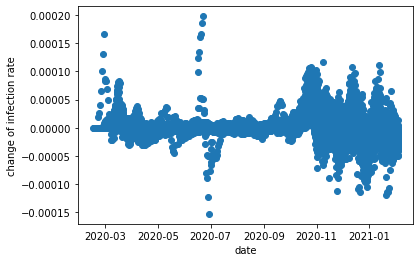

In [21]:
plt.scatter(df13['date'], df13['change of infection rate'])
plt.xlabel('date')
plt.ylabel('change of infection rate')
plt.show()

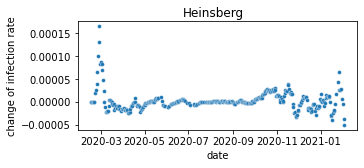

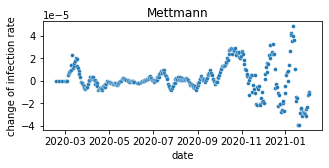

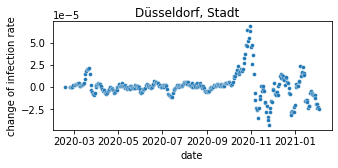

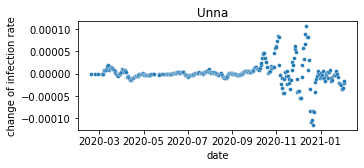

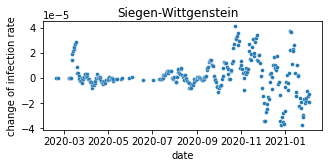

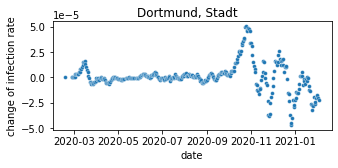

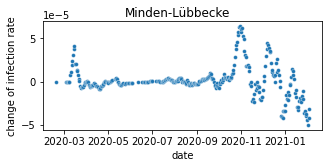

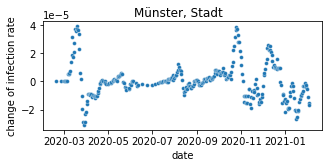

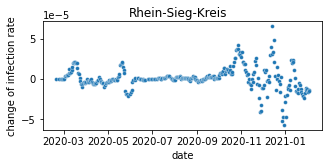

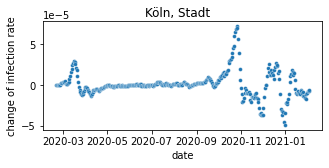

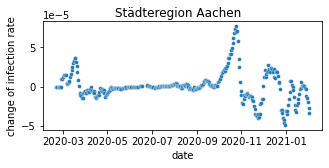

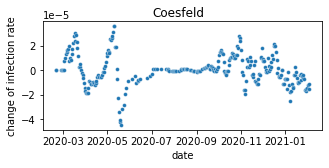

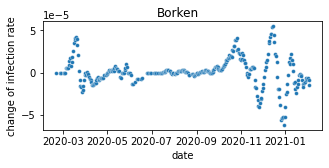

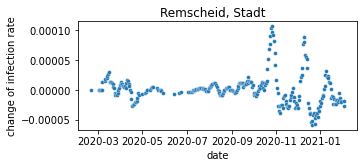

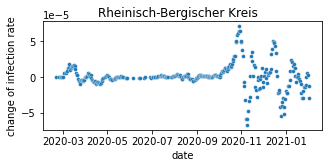

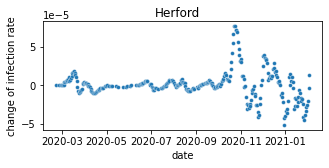

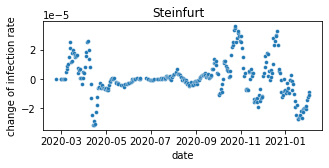

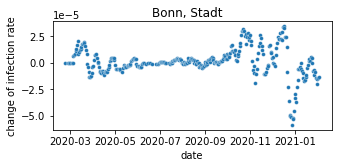

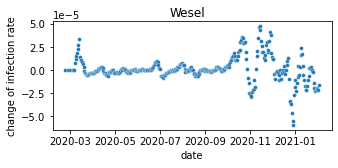

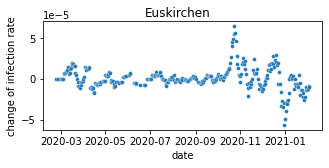

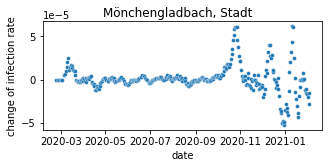

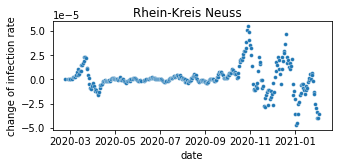

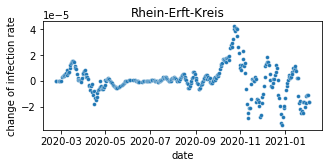

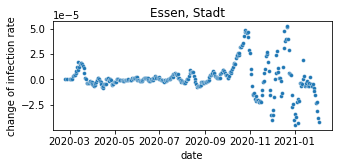

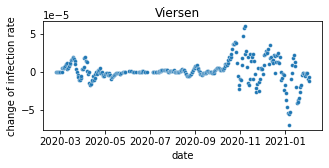

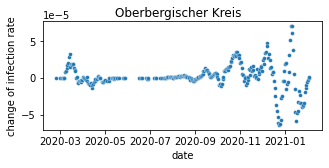

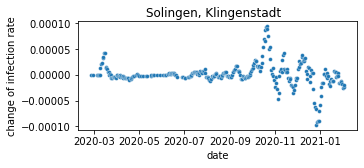

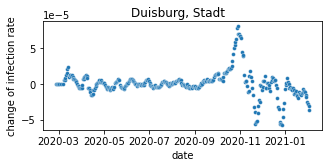

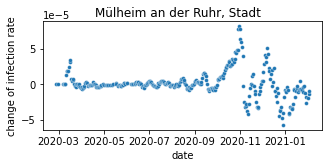

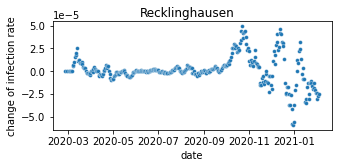

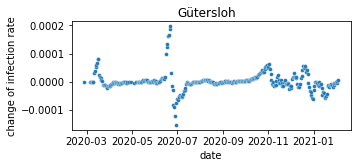

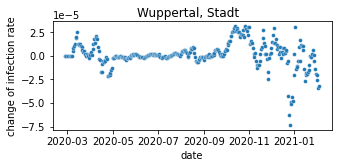

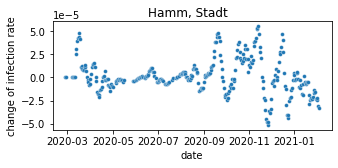

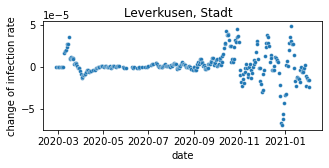

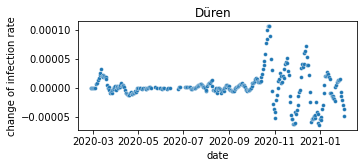

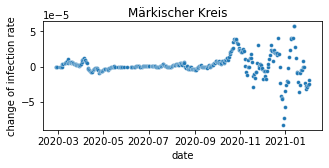

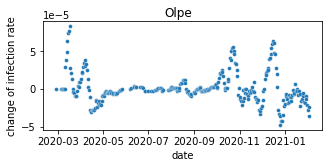

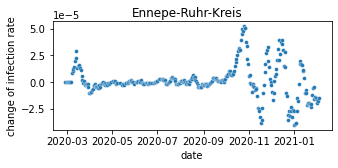

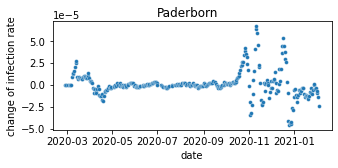

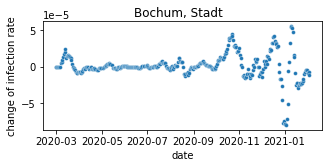

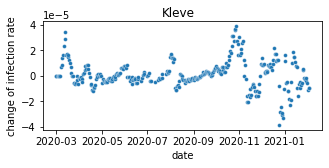

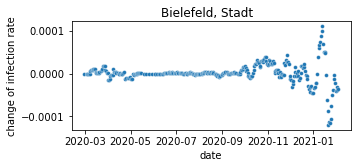

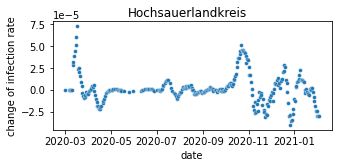

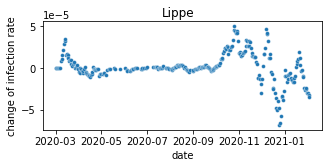

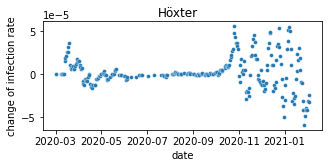

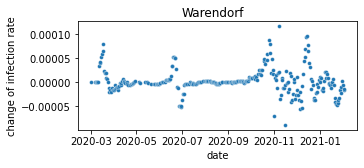

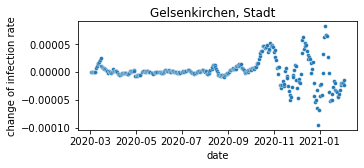

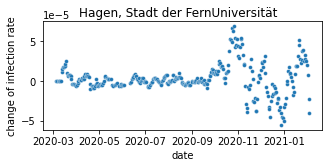

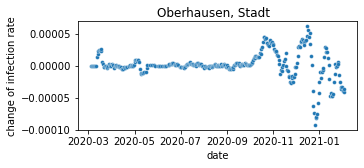

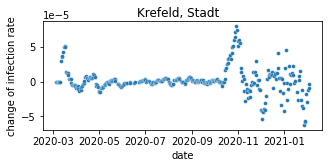

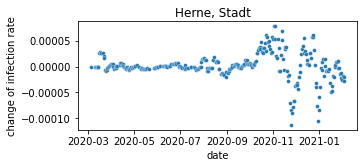

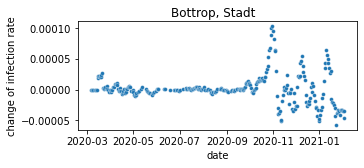

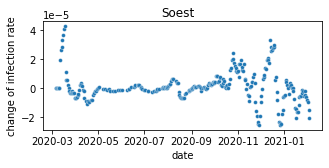

In [24]:
for c in county:
    dfc=df13[df13['county']==c]
    sns.scatterplot(x=dfc['date'], y=dfc['change of infection rate'], s=15)
    fig = plt.gcf()
    fig.set_size_inches(5, 2)
    fig.suptitle(c, fontsize=12)
    plt.show()